Project Description
This data is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea. This data consists of summer data from 2013 to 2017. The input data is largely composed of the LDAPS model's next-day forecast data, in-situ maximum and minimum temperatures of present-day, and geographic auxiliary variables. There are two outputs (i.e. next-day maximum and minimum air temperatures) in this data. Hindcast validation was conducted for the period from 2015 to 2017


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('temperature.csv')

In [3]:
df

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,30-08-2017,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


In [4]:
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [5]:
df.shape

(7752, 25)

In [6]:
df.tail()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,30-08-2017,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3
7751,NaN,NaN,37.6,29.9,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,...,21.621661,15.841235,16.655469,37.6450,127.135,212.3350,5.178230,5992.895996,38.9,29.8


In [7]:
df.dtypes

station             float64
Date                 object
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

In [8]:
df.nunique()

station               25
Date                 310
Present_Tmax         167
Present_Tmin         155
LDAPS_RHmin         7672
LDAPS_RHmax         7664
LDAPS_Tmax_lapse    7675
LDAPS_Tmin_lapse    7675
LDAPS_WS            7675
LDAPS_LH            7675
LDAPS_CC1           7569
LDAPS_CC2           7582
LDAPS_CC3           7599
LDAPS_CC4           7524
LDAPS_PPT1          2812
LDAPS_PPT2          2510
LDAPS_PPT3          2356
LDAPS_PPT4          1918
lat                   12
lon                   25
DEM                   25
Slope                 27
Solar radiation     1575
Next_Tmax            183
Next_Tmin            157
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


In [10]:
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

We see here that we have few null values here in the data, which we will treat.

Dealing with dates to change them.

In [11]:
df['Date'] = pd.to_datetime(df.Date)

In [12]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

In [13]:
df.drop('Date', inplace = True, axis = 1)

In [14]:
df

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Year,Month,Day
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,...,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2,2013.0,6.0,30.0
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,...,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5,2013.0,6.0,30.0
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,...,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9,2013.0,6.0,30.0
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,...,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3,2013.0,6.0,30.0
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,...,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5,2013.0,6.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,...,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1,2017.0,8.0,30.0
7748,24.0,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,...,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8,2017.0,8.0,30.0
7749,25.0,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,0.048954,...,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4,2017.0,8.0,30.0
7750,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,...,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3,NaN,NaN,NaN


# Let us work with the null values now.

EDA

<AxesSubplot:>

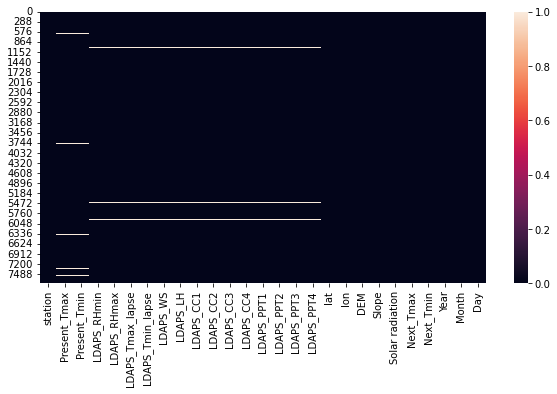

In [15]:
plt.figure(figsize = (10,5))
sns.heatmap(df.isnull())

In [16]:
df_imp_col = ['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope',
       'Solar radiation', 'Next_Tmax', 'Next_Tmin', 'Year', 'Month', 'Day']

In [17]:
from sklearn.impute import KNNImputer
knni = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
df = knni.fit_transform(df)
df = pd.DataFrame(df, columns = df_imp_col)
df.head()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Year,Month,Day
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,...,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2,2013.0,6.0,30.0
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,...,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5,2013.0,6.0,30.0
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,...,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9,2013.0,6.0,30.0
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,...,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3,2013.0,6.0,30.0
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,...,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5,2013.0,6.0,30.0


In [18]:
df.isnull().sum()

station             0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
Year                0
Month               0
Day                 0
dtype: int64

All the na values are removed after imputing using KNN.

In [19]:
ldaps_test = ['LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4']
for i in ldaps_test:
    print(df[i].value_counts())
    print('\n')

0.000000    4871
0.001953      11
0.002604       5
0.001734       3
0.253744       3
            ... 
0.300116       1
0.334242       1
0.310967       1
0.256075       1
2.040502       1
Name: LDAPS_PPT1, Length: 2855, dtype: int64


0.000000    5174
0.001953       7
0.000781       3
0.010005       3
0.000040       3
            ... 
0.001857       1
0.003385       1
0.016558       1
0.002773       1
0.247997       1
Name: LDAPS_PPT2, Length: 2558, dtype: int64


0.000000    5318
0.001953      10
0.000852       4
0.027203       3
0.002604       3
            ... 
0.028196       1
0.003034       1
0.121254       1
0.043389       1
0.021030       1
Name: LDAPS_PPT3, Length: 2402, dtype: int64


0.000000    5799
0.000290       4
0.001953       3
0.001105       2
0.000508       2
            ... 
4.265625       1
0.009690       1
0.005128       1
0.002683       1
3.093815       1
Name: LDAPS_PPT4, Length: 1938, dtype: int64




# Cheaking Correlation

<AxesSubplot:>

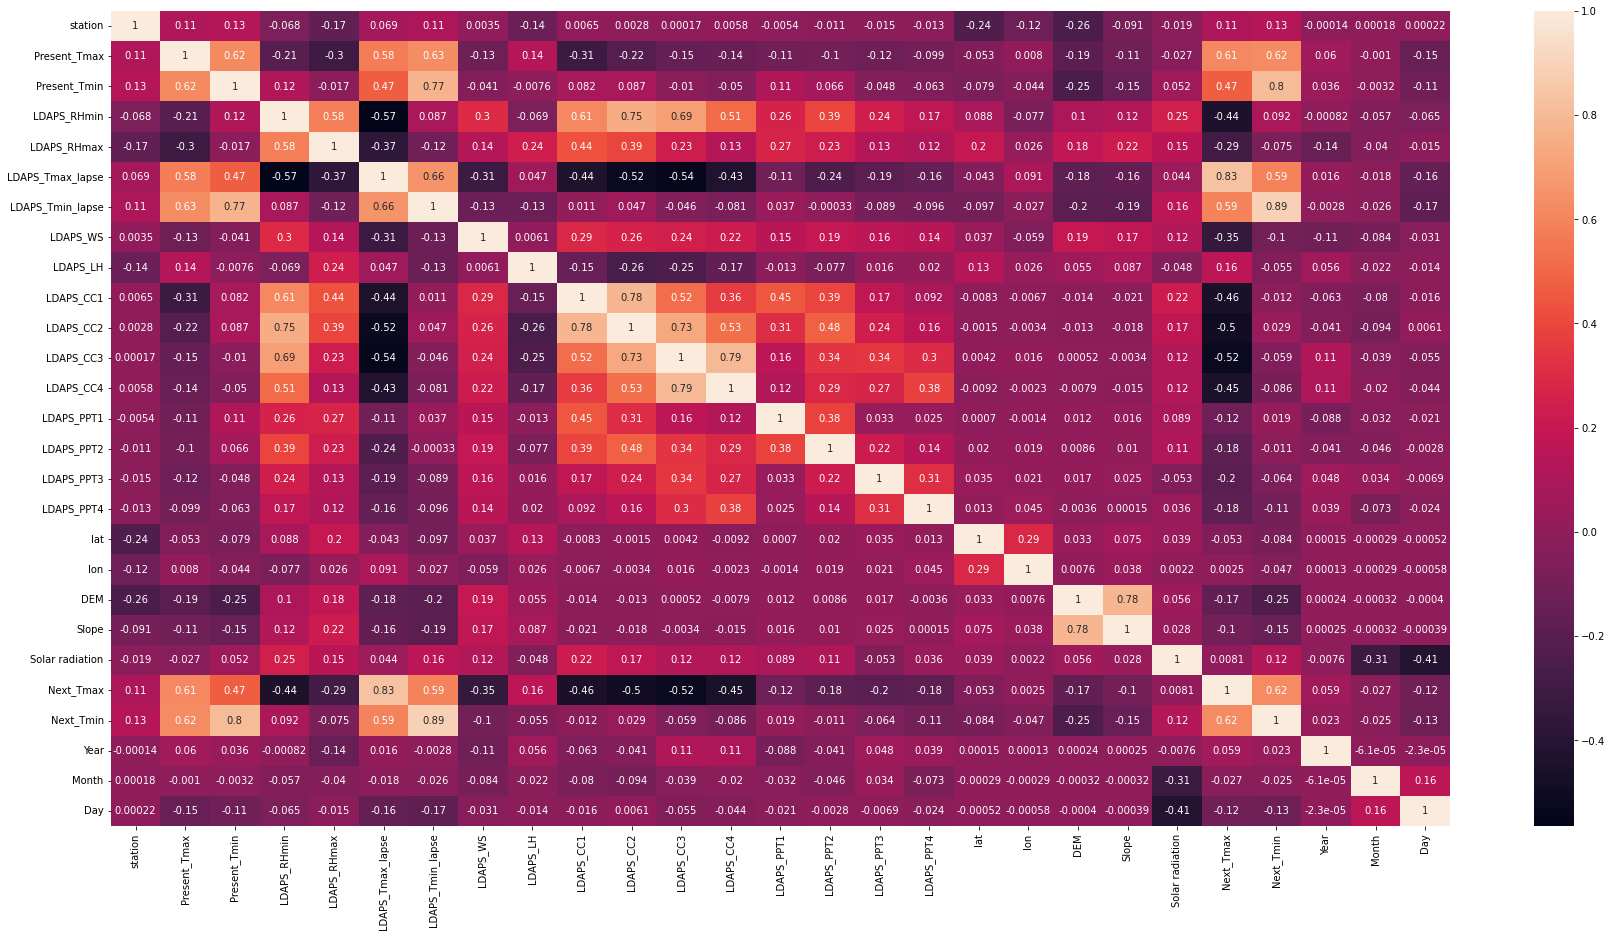

In [20]:
plt.figure(figsize = (30,15))
sns.heatmap(df.corr(), annot=True)

# Visualisation.

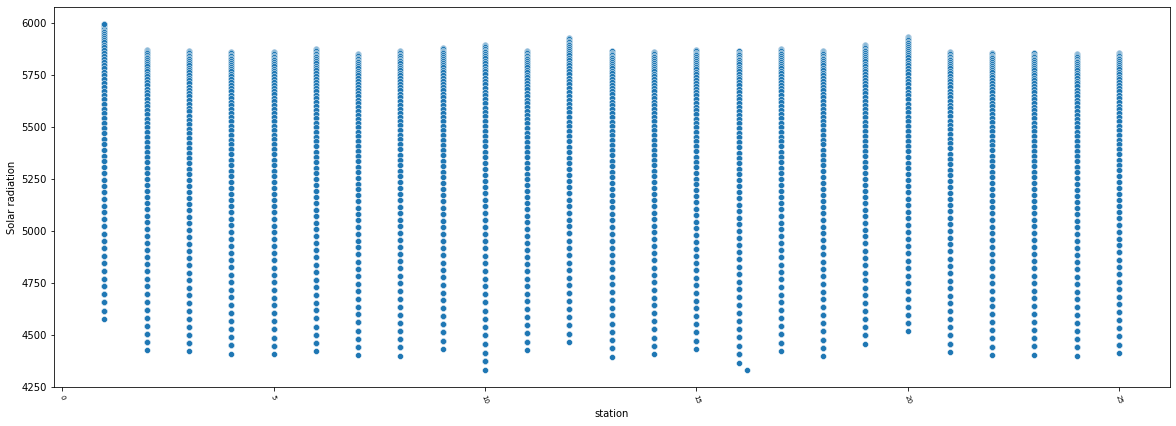

In [21]:
plt.figure(figsize = (20,7))
sns.scatterplot(y="Solar radiation", x="station", data = df)
plt.xticks(rotation = -70, fontsize = 7)
plt.show()

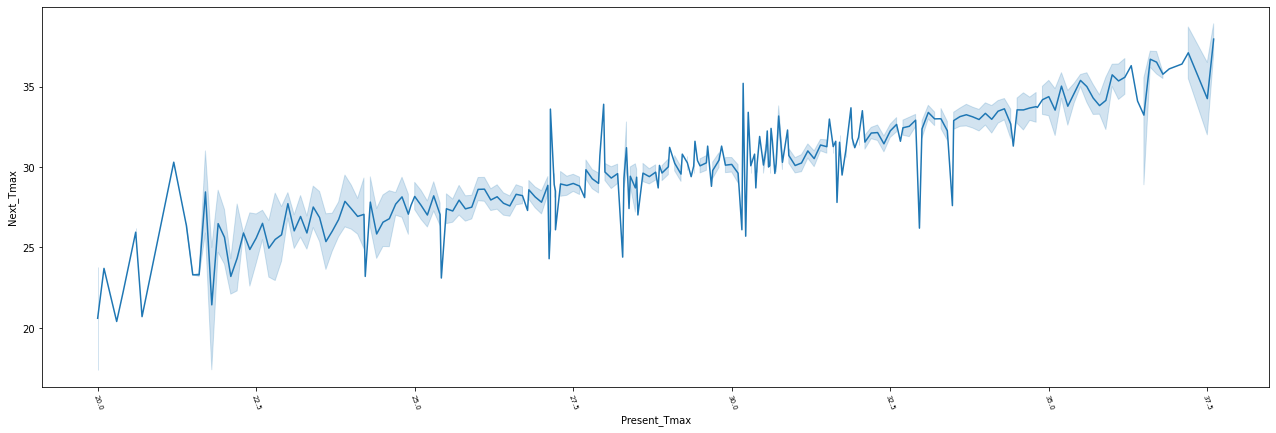

In [22]:
plt.figure(figsize = (22,7))
sns.lineplot(y="Next_Tmax", x="Present_Tmax", data = df)
plt.xticks(rotation = -70, fontsize = 7)
plt.show()

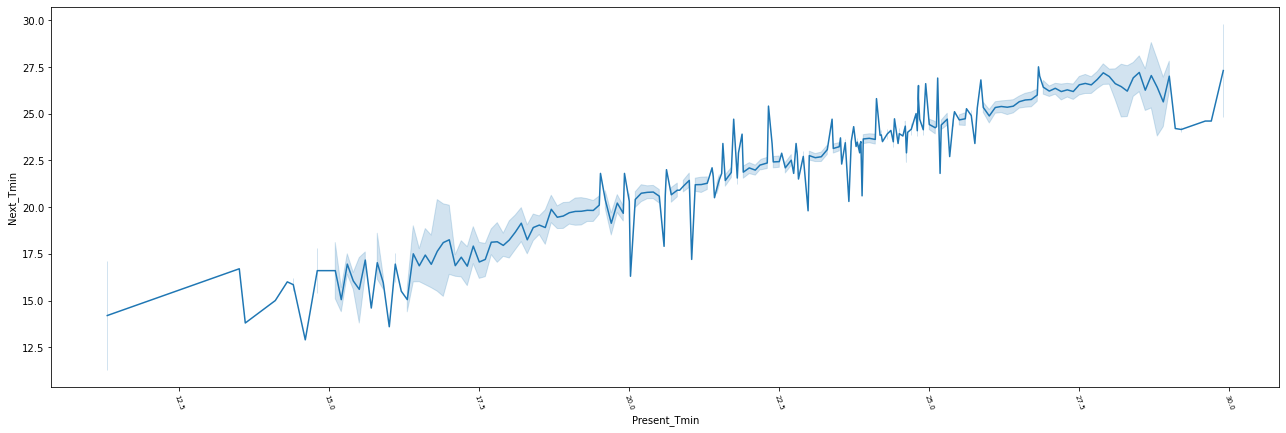

In [23]:
plt.figure(figsize = (22,7))
sns.lineplot(y="Next_Tmin", x="Present_Tmin", data = df)
plt.xticks(rotation = -70, fontsize = 7)
plt.show()

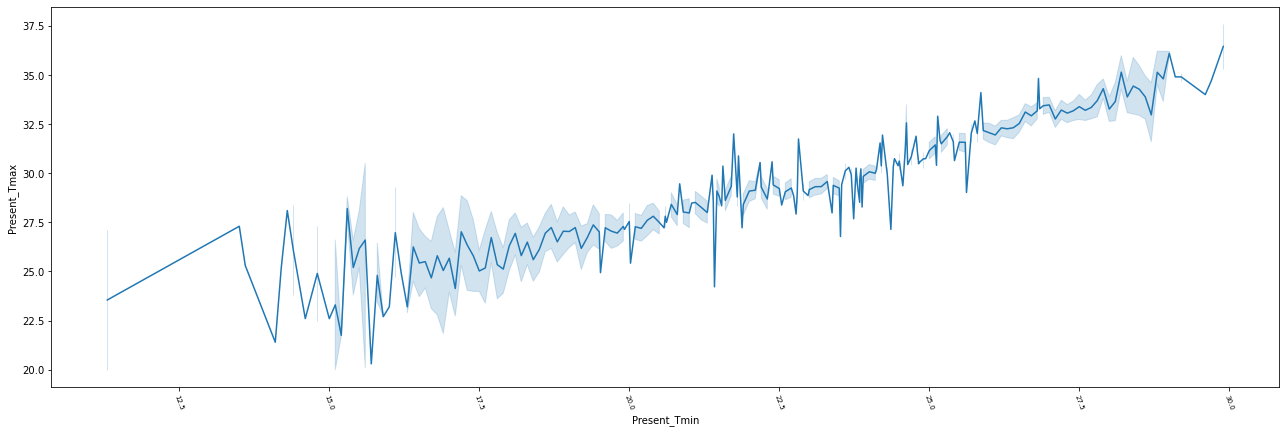

In [24]:
plt.figure(figsize = (22,7))
sns.lineplot(y="Present_Tmax", x="Present_Tmin", data = df)
plt.xticks(rotation = -70, fontsize = 7)
plt.show()

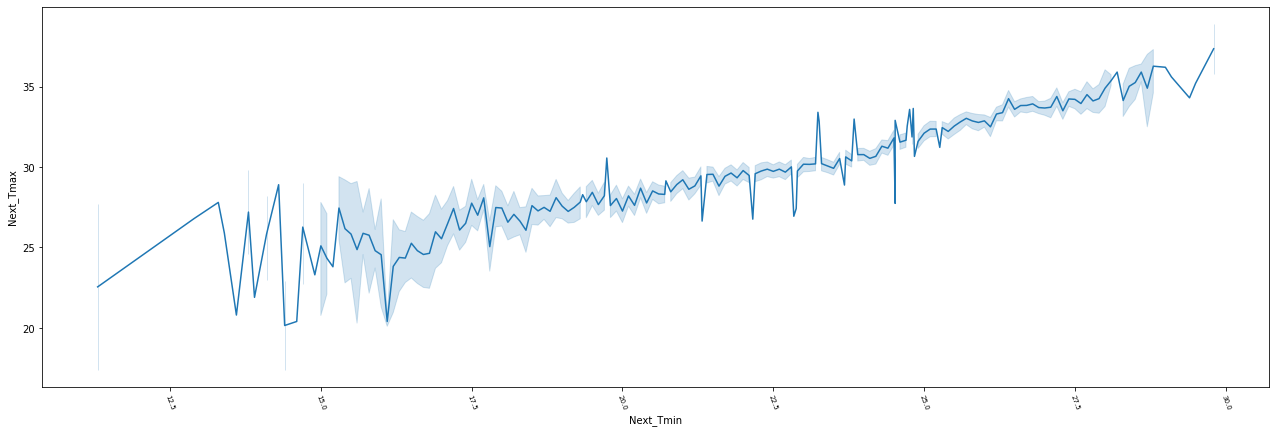

In [25]:
plt.figure(figsize = (22,7))
sns.lineplot(y="Next_Tmax", x="Next_Tmin", data = df)
plt.xticks(rotation = -70, fontsize = 7)
plt.show()

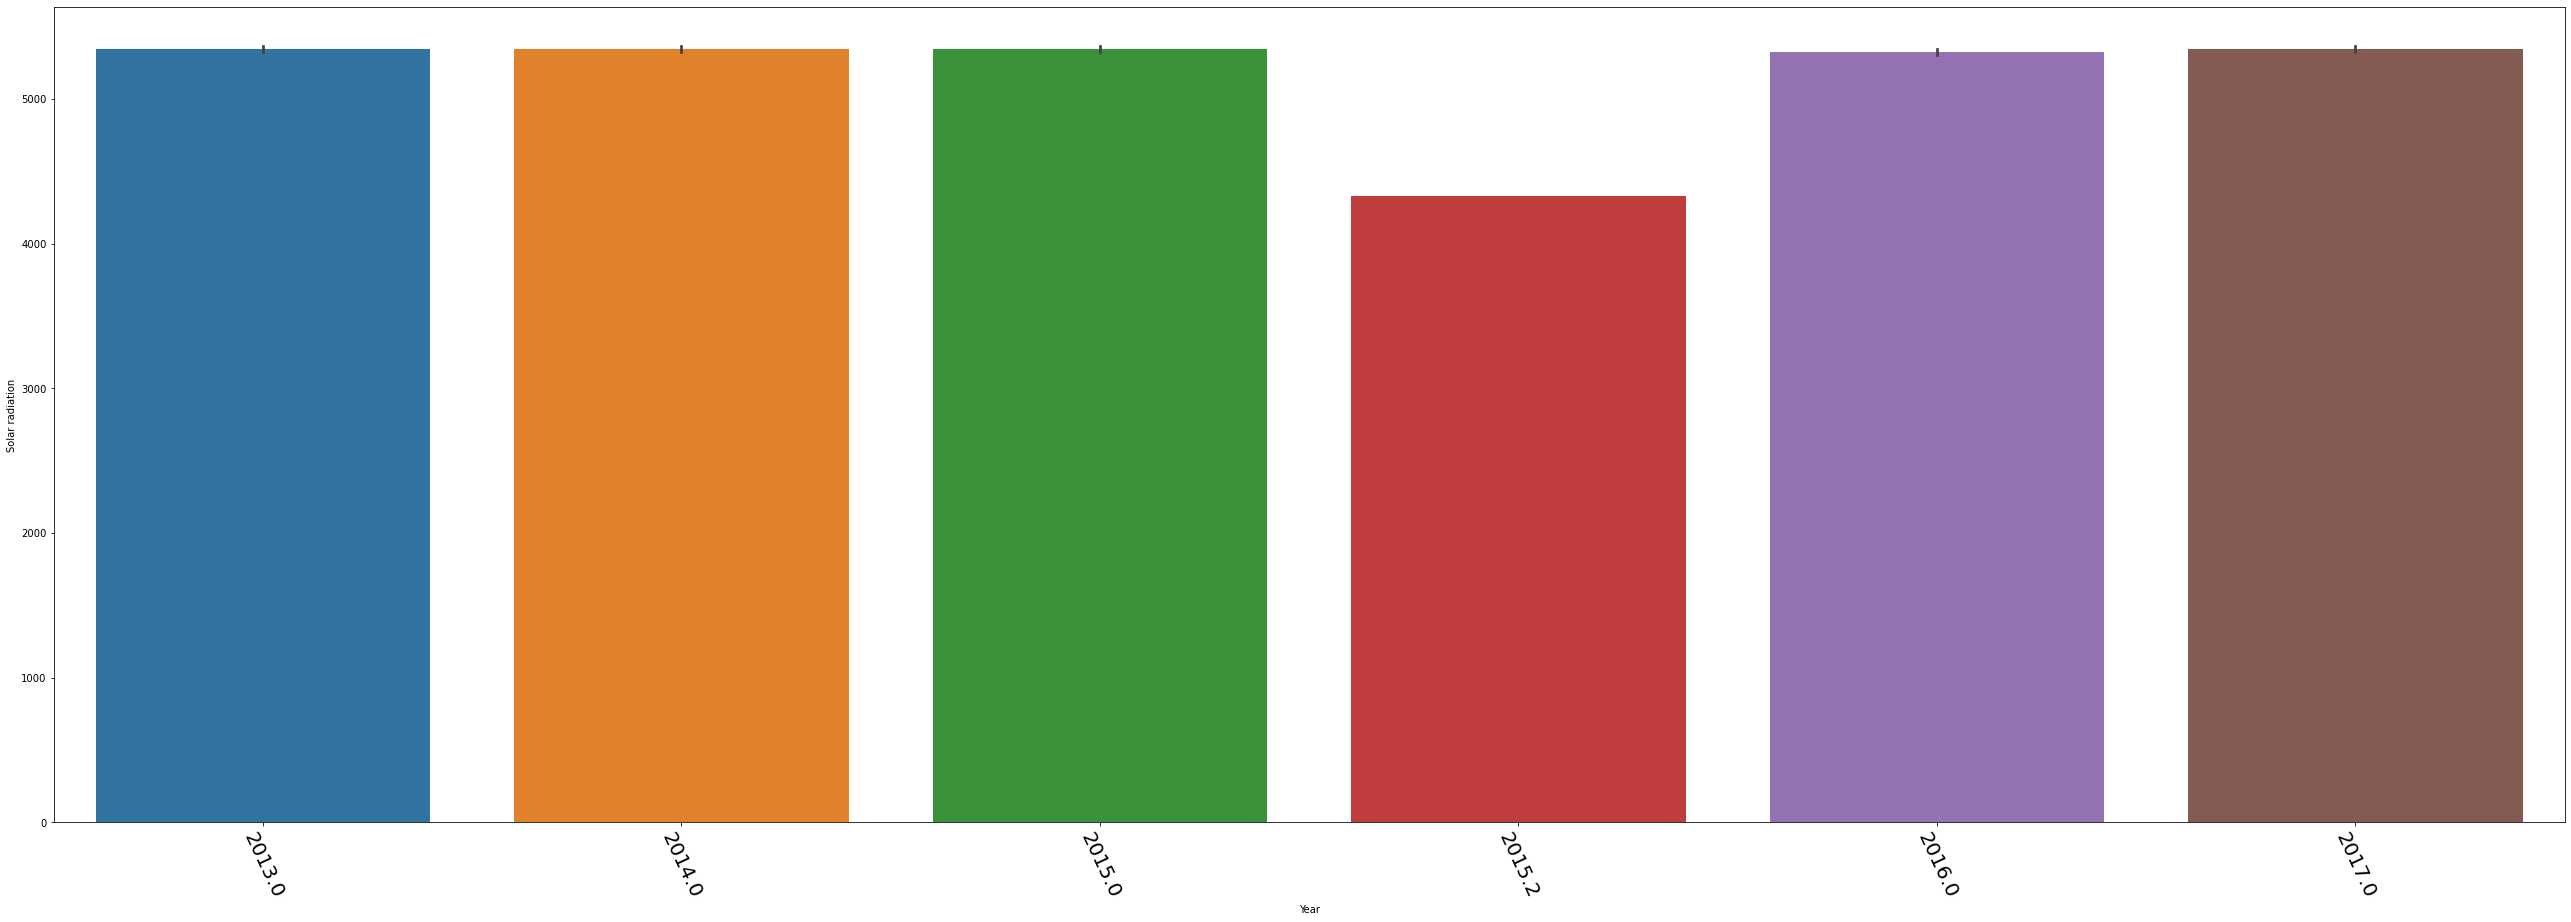

In [26]:
plt.figure(figsize = (45,15))
sns.barplot(x = 'Year', y ='Solar radiation', data = df)
plt.xticks(rotation = -65, fontsize = 20)
plt.show()

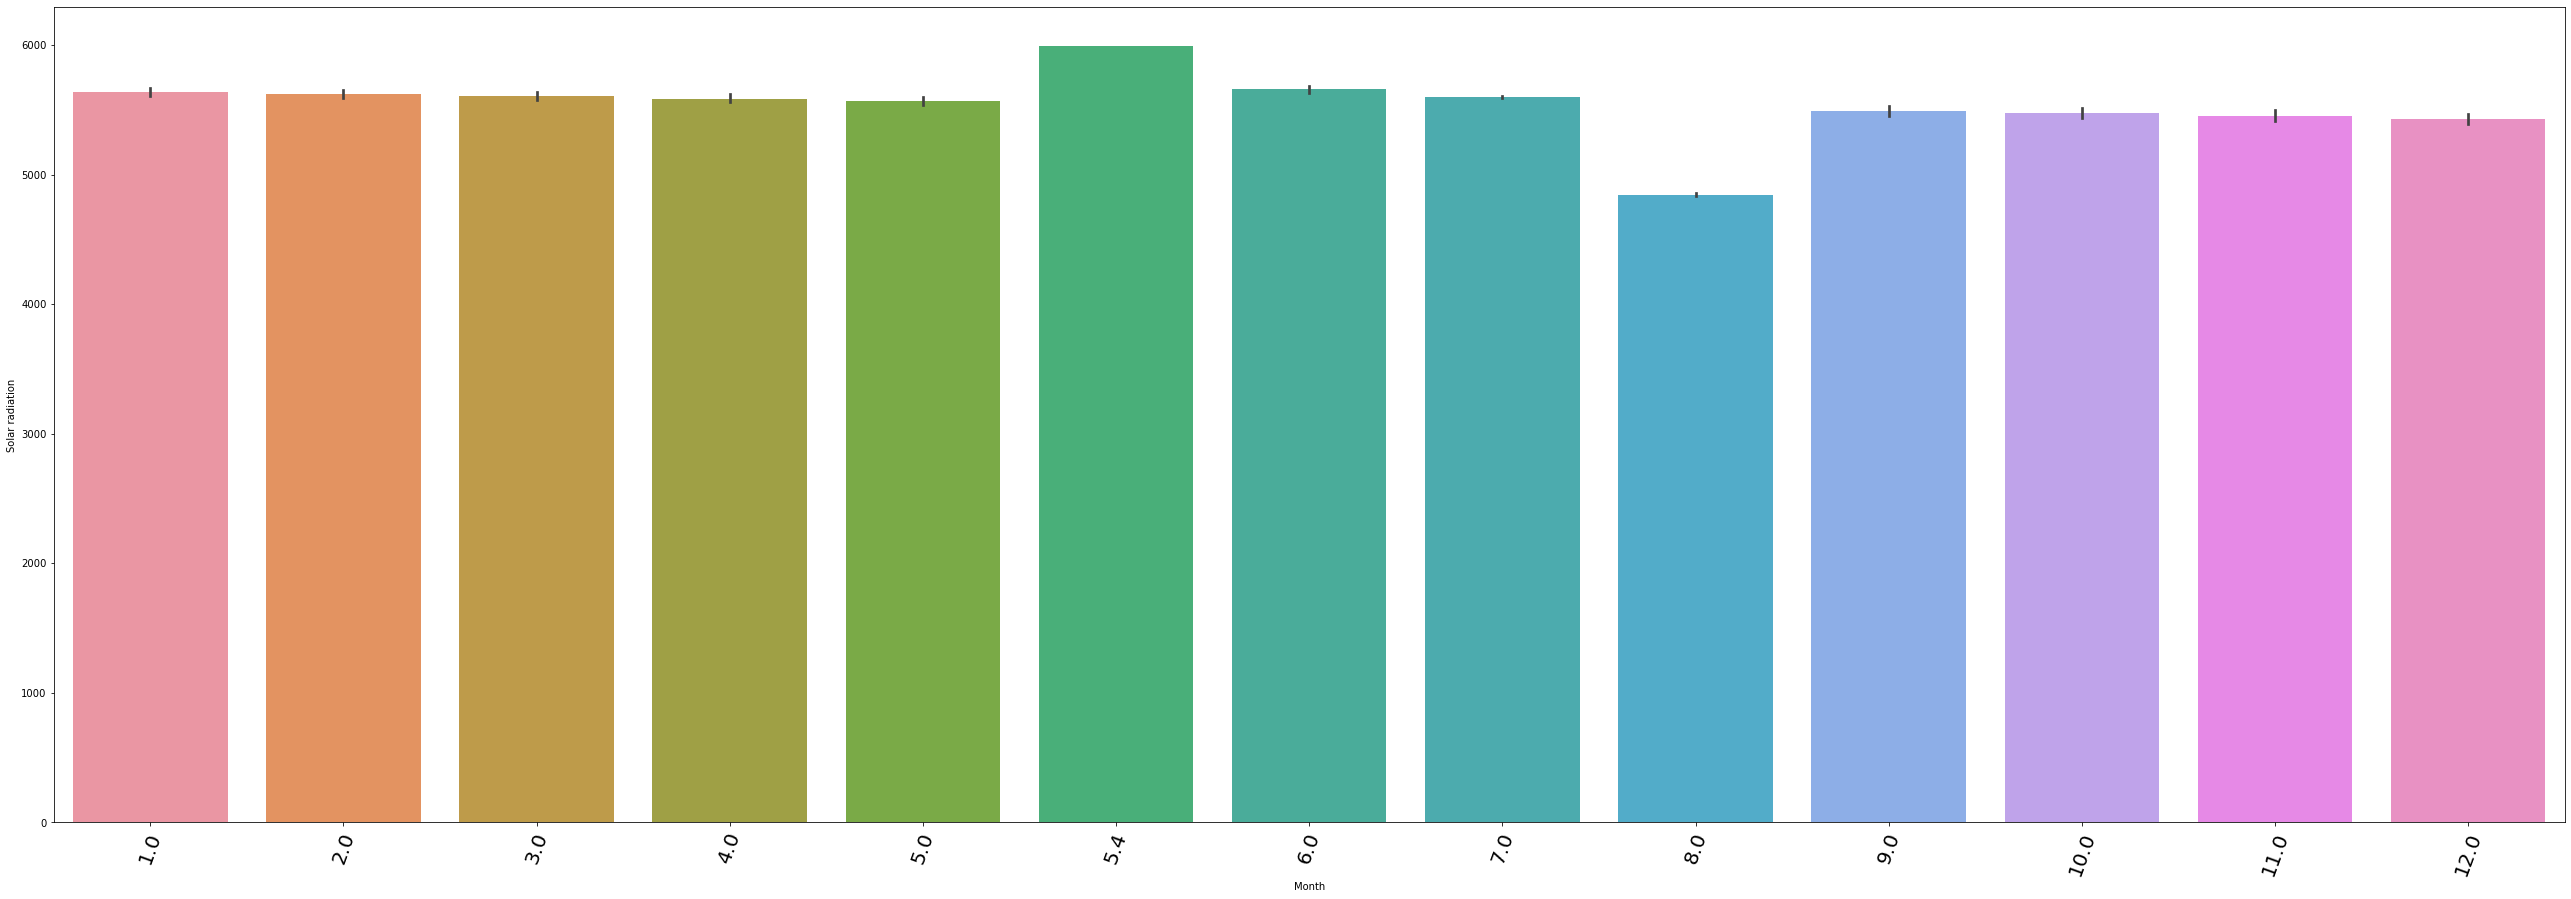

In [27]:
plt.figure(figsize = (45,15))
sns.barplot(x = 'Month', y ='Solar radiation', data = df)
plt.xticks(rotation = 70, fontsize = 20)
plt.show()

In [28]:
sns.distplot?
df.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Year,Month,Day
count,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,...,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.00000
mean,12.998865,29.769249,23.226713,56.712966,88.369128,29.633310,23.526105,7.089773,62.527477,0.368300,...,37.544722,126.991397,61.867972,1.257048,5341.502803,30.275544,22.934450,2015.000155,7.080547,16.37211
std,7.212017,2.963391,2.408518,14.620018,7.168515,2.941858,2.339946,2.176008,33.645225,0.261542,...,0.050352,0.079435,54.279780,1.370444,429.158867,3.125852,2.485431,1.414170,2.238181,8.24190
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,...,37.456200,126.826000,12.370000,0.098475,4329.520508,17.400000,11.300000,2013.000000,1.000000,7.00000
25%,7.000000,27.800000,21.700000,45.973853,84.246307,27.693091,22.114651,5.680214,37.412333,0.148273,...,37.510200,126.937000,28.700000,0.271300,4999.018555,28.200000,21.380000,2014.000000,7.000000,8.00000
50%,13.000000,29.900000,23.400000,54.959623,89.750568,29.744207,23.771672,6.540041,56.953214,0.314835,...,37.550700,126.995000,45.716000,0.618000,5436.345215,30.500000,23.100000,2015.000000,7.000000,16.00000
75%,19.000000,32.000000,24.900000,67.078279,93.711344,31.734400,25.162746,8.009219,84.192035,0.571811,...,37.577600,127.042000,59.832400,1.767800,5728.316406,32.600000,24.600000,2016.000000,8.000000,24.00000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,...,37.645000,127.135000,212.335000,5.178230,5992.895996,38.900000,29.800000,2017.000000,12.000000,31.00000


# Checking for outliers.

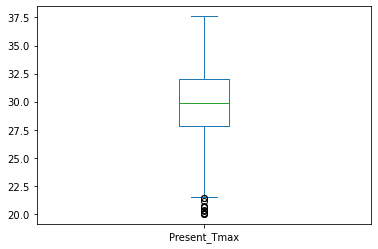

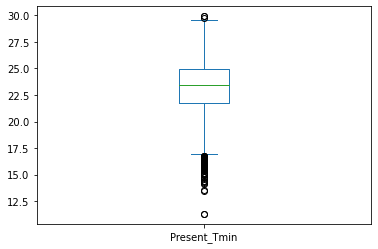

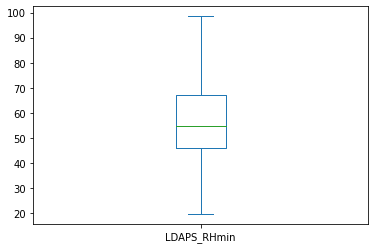

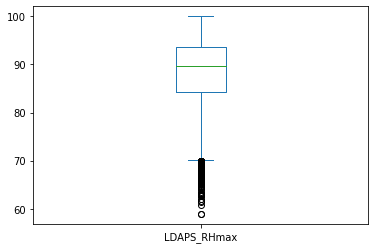

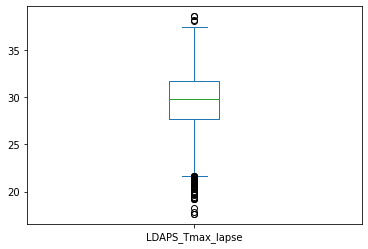

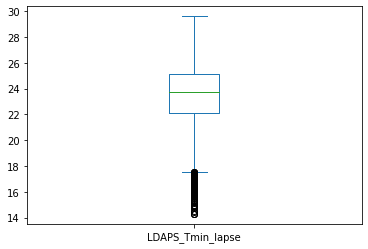

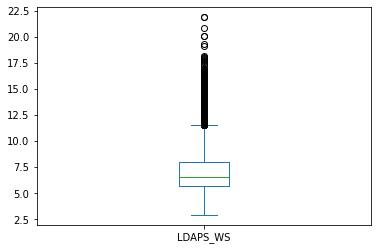

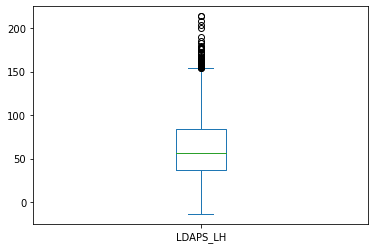

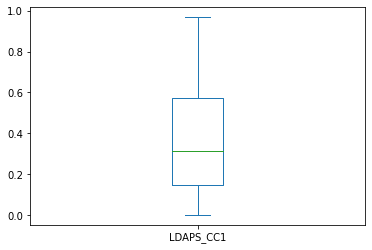

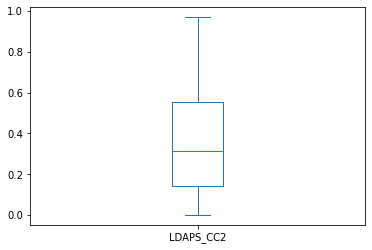

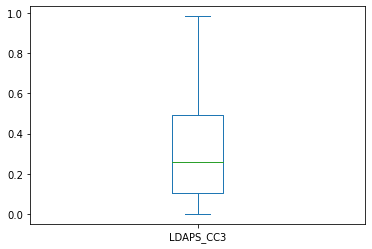

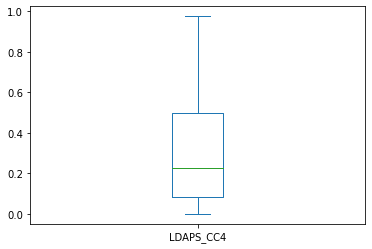

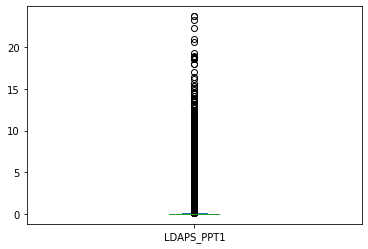

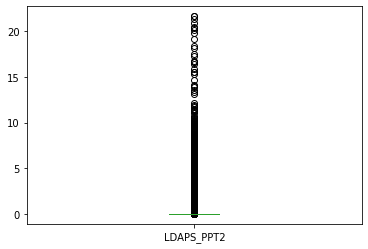

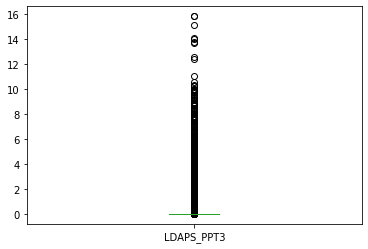

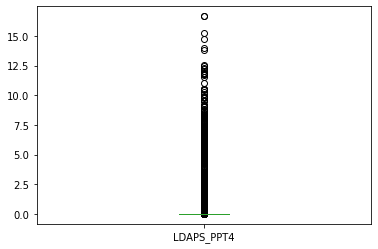

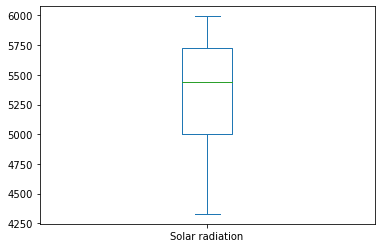

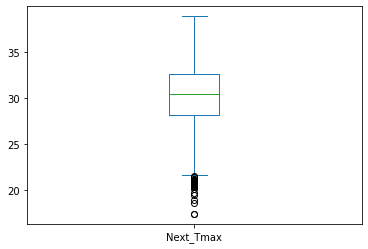

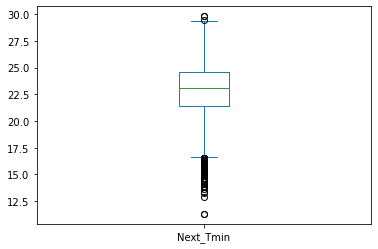

In [29]:
cols = ['Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 
 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 
 'LDAPS_CC4', 'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4','Solar radiation', 
 'Next_Tmax', 'Next_Tmin']
for i in cols:
    df[i].plot.box()
    plt.show()

In [30]:
from scipy.stats import zscore
z = np.abs(zscore(df))
threshold = 3
np.where(z>3)

(array([  25,   25,   26, ..., 7751, 7751, 7751], dtype=int64),
 array([ 7, 14, 14, ..., 14, 15, 16], dtype=int64))

In [31]:
df_new = df[(z<3).all(axis = 1)]
df_new

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Year,Month,Day
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,...,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2,2013.0,6.0,30.0
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,...,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5,2013.0,6.0,30.0
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,...,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9,2013.0,6.0,30.0
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,...,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3,2013.0,6.0,30.0
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,...,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5,2013.0,6.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,21.0,23.1,17.8,24.688997,78.261383,27.812697,18.303014,6.603253,9.614074,0.052902,...,37.5507,127.040,26.2980,0.5721,4456.024414,27.6,17.7,2017.0,8.0,30.0
7746,22.0,22.5,17.4,30.094858,83.690018,26.704905,17.814038,5.768083,82.146707,0.066461,...,37.5102,127.086,21.9668,0.1332,4441.803711,28.0,17.1,2017.0,8.0,30.0
7747,23.0,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,...,37.5372,126.891,15.5876,0.1554,4443.313965,28.3,18.1,2017.0,8.0,30.0
7748,24.0,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,...,37.5237,126.909,17.2956,0.2223,4438.373535,28.6,18.8,2017.0,8.0,30.0


In [32]:
df_new.shape

(6897, 27)

In [33]:
df.shape

(7752, 27)

In [34]:
#Finding the percentage of dataloss

loss = ((7752-6897)/7752)*100
loss

11.029411764705882

We cannot afford to loose more than 10% of the day and hence we will try using IQR.

Just because we are not sure on the prediction value let us try to create 2 models and check if we can get something out of it.

In [35]:
df_no_out = df_new
df_no_out.head()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Year,Month,Day
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,...,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2,2013.0,6.0,30.0
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,...,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5,2013.0,6.0,30.0
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,...,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9,2013.0,6.0,30.0
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,...,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3,2013.0,6.0,30.0
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,...,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5,2013.0,6.0,30.0


In [36]:
df_no_out.shape

(6897, 27)

# Checking for skewness

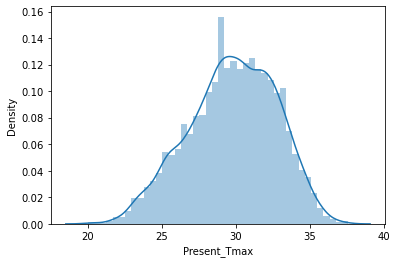

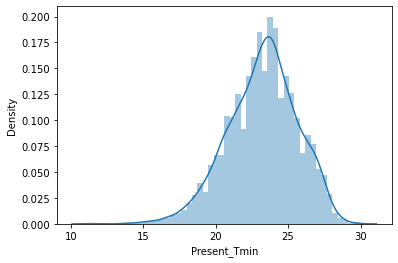

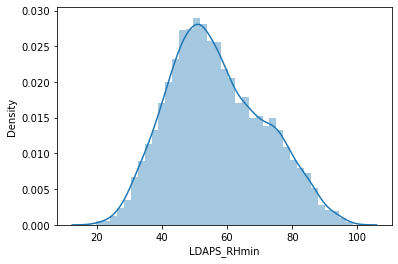

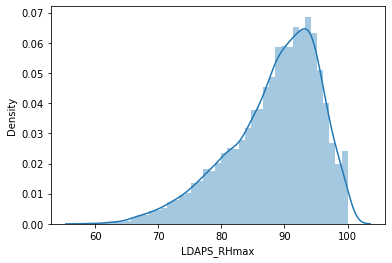

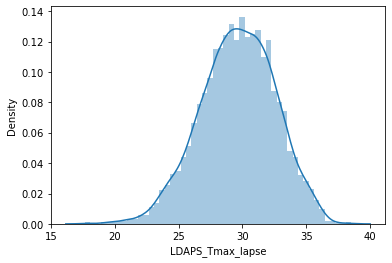

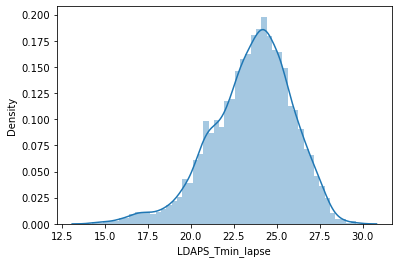

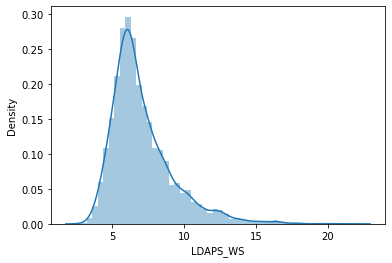

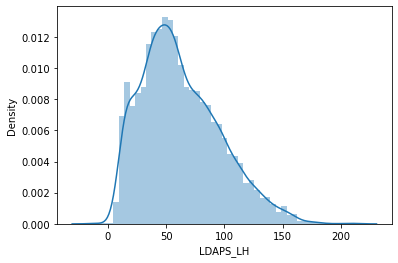

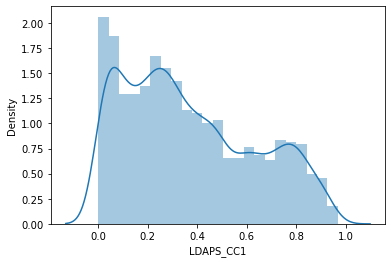

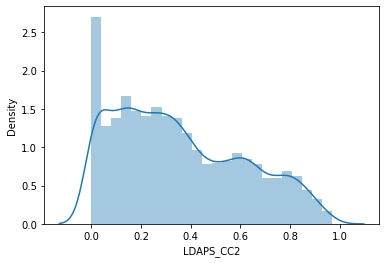

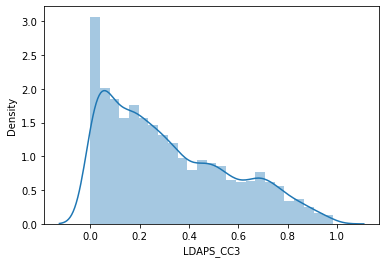

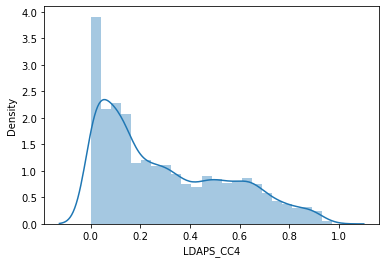

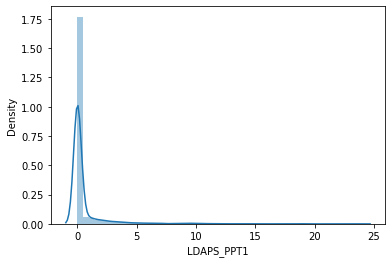

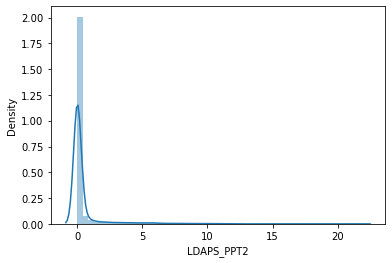

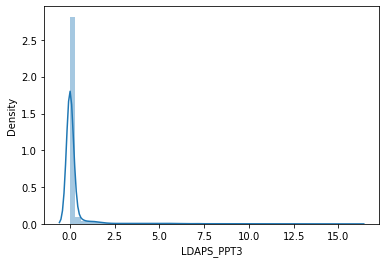

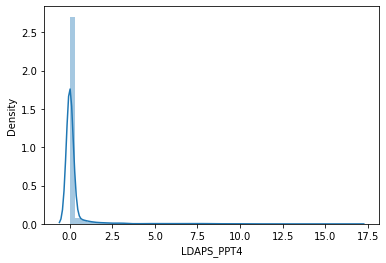

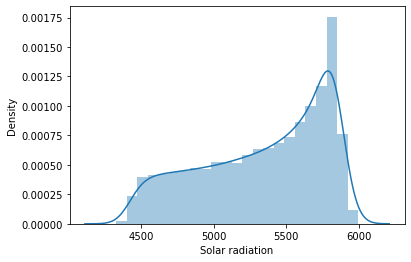

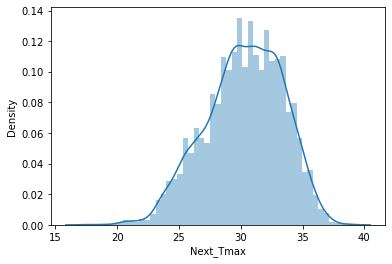

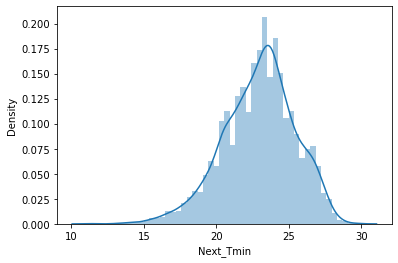

In [37]:
for i in cols: 
    sns.distplot(df[i], kde = True)
    plt.show()

In [38]:
df.skew()

station            -0.000111
Present_Tmax       -0.263172
Present_Tmin       -0.366972
LDAPS_RHmin         0.306680
LDAPS_RHmax        -0.849100
LDAPS_Tmax_lapse   -0.240289
LDAPS_Tmin_lapse   -0.590007
LDAPS_WS            1.583093
LDAPS_LH            0.668231
LDAPS_CC1           0.462245
LDAPS_CC2           0.477772
LDAPS_CC3           0.650527
LDAPS_CC4           0.671576
LDAPS_PPT1          5.392290
LDAPS_PPT2          5.776056
LDAPS_PPT3          6.452470
LDAPS_PPT4          6.826930
lat                 0.087062
lon                -0.285213
DEM                 1.723257
Slope               1.563020
Solar radiation    -0.511210
Next_Tmax          -0.339739
Next_Tmin          -0.406029
Year               -0.000282
Month              -0.705146
Day                 0.245510
dtype: float64

We see a significant skewness here in the data.

Splitting.

In [39]:
x = df.drop(['Next_Tmax', 'Next_Tmin'], axis = 1)
y = df[['Next_Tmax', 'Next_Tmin']]
x.head()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Year,Month,Day
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,...,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,2013.0,6.0,30.0
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,...,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,2013.0,6.0,30.0
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,...,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,2013.0,6.0,30.0
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,...,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,2013.0,6.0,30.0
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,...,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,2013.0,6.0,30.0


In [40]:
y.head()

,Next_Tmax,Next_Tmin
0,29.1,21.2
1,30.5,22.5
2,31.1,23.9
3,31.7,24.3
4,31.2,22.5


For another model as well, lets take it parallely.

In [41]:
x_wo = df_no_out.drop(['Next_Tmax', 'Next_Tmin'], axis = 1)
y_wo = df_no_out[['Next_Tmax', 'Next_Tmin']]
x_wo.head()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Year,Month,Day
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,...,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,2013.0,6.0,30.0
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,...,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,2013.0,6.0,30.0
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,...,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,2013.0,6.0,30.0
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,...,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,2013.0,6.0,30.0
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,...,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,2013.0,6.0,30.0


In [42]:
y_wo.head()

,Next_Tmax,Next_Tmin
0,29.1,21.2
1,30.5,22.5
2,31.1,23.9
3,31.7,24.3
4,31.2,22.5


# Skewness

In [43]:
from sklearn.preprocessing import PowerTransformer
#Removing the skewness in the x variable (with outliers)
pt = PowerTransformer(method='yeo-johnson')
x = pt.fit_transform(x)
x_wo = pt.fit_transform(x_wo)

In [44]:
x_cols = ['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope',
       'Solar radiation', 'Year', 'Month', 'Day']

In [45]:
x = pd.DataFrame(x, columns = x_cols)
x.head()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Year,Month,Day
0,-1.859780,-0.408480,-0.796919,0.177609,0.273125,-0.563788,-0.319975,0.100425,0.309679,-0.407959,...,-0.496929,-0.446026,0.0,-0.027632,1.834978,1.314153,1.849430,-1.414465,-0.582312,1.418607
1,-1.647833,0.702900,-0.719541,-0.236202,0.186248,0.034292,0.135699,-0.618907,-0.211122,-0.447062,...,-0.496929,-0.446026,0.0,0.497283,0.055979,-0.385336,1.400702,-1.414465,-0.582312,1.418607
2,-1.454324,0.593734,-0.028752,-0.495825,-0.771297,0.117560,0.385617,-0.307808,-1.372196,-0.523240,...,-0.496929,-0.446026,0.0,0.836548,-0.364575,-0.949164,1.380650,-1.414465,-0.582312,1.418607
3,-1.273463,0.739518,0.013736,0.176543,1.314025,-0.015993,-0.182444,-0.650135,0.203745,-0.489908,...,-0.496929,-0.446026,0.0,0.368125,0.084879,1.235263,1.357783,-1.414465,-0.582312,1.418607
4,-1.102081,0.521529,-0.601943,0.036714,0.111557,-0.217322,-0.112047,-0.587120,1.297106,-0.810987,...,-0.496929,-0.446026,0.0,1.871193,-0.290442,-0.401730,1.366748,-1.414465,-0.582312,1.418607


In [46]:
x_wo = pd.DataFrame(x_wo, columns = x_cols)
x_wo.head()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Year,Month,Day
0,-1.871161,-0.480902,-0.847404,0.261086,0.348095,-0.682225,-0.367215,0.179043,0.347609,-0.310397,...,-0.466139,-0.41484,0.0,-0.019997,1.854411,1.329637,1.889291,0.0,-0.583813,1.419717
1,-1.658603,0.665534,-0.765729,-0.171062,0.260555,-0.042357,0.100776,-0.576227,-0.170916,-0.351767,...,-0.466139,-0.41484,0.0,0.503362,0.069695,-0.374203,1.434084,0.0,-0.583813,1.419717
2,-1.464532,0.552522,-0.046632,-0.441918,-0.723156,0.045724,0.354257,-0.251849,-1.385413,-0.432632,...,-0.466139,-0.41484,0.0,0.841623,-0.353347,-0.943116,1.413731,0.0,-0.583813,1.419717
3,-1.283141,0.703460,-0.002953,0.259973,1.379796,-0.095662,-0.225128,-0.608608,0.243178,-0.397205,...,-0.466139,-0.41484,0.0,0.374587,0.098752,1.251068,1.390520,0.0,-0.583813,1.419717
4,-1.111255,0.477819,-0.642058,0.113889,0.185092,-0.309970,-0.152687,-0.543234,1.299432,-0.741269,...,-0.466139,-0.41484,0.0,1.873207,-0.278748,-0.390725,1.399621,0.0,-0.583813,1.419717


In [47]:
x.skew()

station            -0.204710
Present_Tmax       -0.036078
Present_Tmin       -0.013699
LDAPS_RHmin        -0.017200
LDAPS_RHmax        -0.116473
LDAPS_Tmax_lapse   -0.011809
LDAPS_Tmin_lapse   -0.021195
LDAPS_WS            0.003522
LDAPS_LH            0.055268
LDAPS_CC1           0.048560
LDAPS_CC2           0.047504
LDAPS_CC3           0.092295
LDAPS_CC4           0.131077
LDAPS_PPT1          1.446305
LDAPS_PPT2          1.628709
LDAPS_PPT3          1.804874
LDAPS_PPT4          2.052019
lat                 0.000000
lon                -0.198429
DEM                 0.039456
Slope               0.233968
Solar radiation    -0.176636
Year               -0.000298
Month               0.043745
Day                -0.041816
dtype: float64

# Scaling

In [49]:
from sklearn.preprocessing import StandardScaler

In [50]:
ss = StandardScaler()

In [51]:
x = ss.fit_transform(x)
x_wo = ss.fit_transform(x_wo)

In [52]:
x = pd.DataFrame(x, columns = x_cols)
x_wo = pd.DataFrame(x_wo, columns = x_cols)

# Modelling

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [54]:
#SupportVectorMachine (SVM) will not work with Multioutput regression
#Creating instances for each model
lr = LinearRegression()
knr = KNeighborsRegressor()
dtr = DecisionTreeRegressor()
rfr = RandomForestRegressor()
ls = Lasso()
rd = Ridge()
eln = ElasticNet()

In [55]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 77)
x_train.shape

(5426, 25)

In [56]:
x_test.shape

(2326, 25)

In [57]:
y_train.shape

(5426, 2)

In [58]:
y_test.shape

(2326, 2)

In [59]:
model = [lr, knr, dtr, rfr, ls, rd, eln]
for m in model:
    print(m)
    m.fit(x_train, y_train)
    a = m.score(x_train, y_train)
    pred_test = m.predict(x_test)
    pred_train = m.predict(x_train)
    print('Score: ', a)
    print('Mean absolute error: ', mean_absolute_error(y_test,pred_test))
    print('Mean squared error: ', mean_squared_error(y_test,pred_test))
    print('Root mean squared error: ', np.sqrt(mean_squared_error(y_test,pred_test)))
    print('R2 Score: ', r2_score(y_test,pred_test))
    print('\n\n')

LinearRegression()
Score:  0.8049534261601679
Mean absolute error:  0.9774940020970744
Mean squared error:  1.671398554650386
Root mean squared error:  1.292825802128959
R2 Score:  0.7964615915648483



KNeighborsRegressor()
Score:  0.9206544632948854
Mean absolute error:  0.7107790197764381
Mean squared error:  0.8903429337919185
Root mean squared error:  0.9435798502468769
R2 Score:  0.8853449955537059



DecisionTreeRegressor()
Score:  1.0
Mean absolute error:  1.0005331040412697
Mean squared error:  1.9798239036973386
Root mean squared error:  1.4070621534592347
R2 Score:  0.7550123000134414



RandomForestRegressor()
Score:  0.985914336933591
Mean absolute error:  0.6622323731728297
Mean squared error:  0.7951648844625969
Root mean squared error:  0.8917201828278851
R2 Score:  0.900089477030616



Lasso()
Score:  0.6074422075947352
Mean absolute error:  1.3937199567313265
Mean squared error:  3.1526728187512494
Root mean squared error:  1.7755767566487373
R2 Score:  0.606421144658

# Cross Validation

In [60]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
model = [lr, knr, dtr, rfr, ls, rd, eln]
for m in model:
    print('The model is: \n',m)
    for j in range (2,10):
        test_accuracy = r2_score(y_test, pred_test)
        cv_score = cross_val_score(m, x, y, cv = j)
        cv_mean = cv_score.mean()
        print(f'At cross fold {j} the cv score is {cv_mean}')
        print('\n\n')

The model is: 
 LinearRegression()
At cross fold 2 the cv score is 0.6888280937942106



At cross fold 3 the cv score is 0.7262411253948328



At cross fold 4 the cv score is 0.7339750302305934



At cross fold 5 the cv score is 0.7236949964000917



At cross fold 6 the cv score is 0.7187395108518309



At cross fold 7 the cv score is 0.7251912866498904



At cross fold 8 the cv score is 0.7242262725588019



At cross fold 9 the cv score is 0.6577364159018644



The model is: 
 KNeighborsRegressor()
At cross fold 2 the cv score is 0.4811905819289616



At cross fold 3 the cv score is 0.5361806813759792



At cross fold 4 the cv score is 0.5176518105221564



At cross fold 5 the cv score is 0.5200242537734677



At cross fold 6 the cv score is 0.5200767927219441



At cross fold 7 the cv score is 0.517307700557628



At cross fold 8 the cv score is 0.5071578384155362



At cross fold 9 the cv score is 0.37860073423443047



The model is: 
 DecisionTreeRegressor()
At cross fold 2 the cv 

Here we see that the best model is Rndom forest considering that the difference is not much and the accuracy is close to 89.

In [61]:
rfr.fit(x_train, y_train)
a = rfr.score(x_train, y_train)
pred_train = rfr.predict(x_train)
pred_test_rfr =rfr.predict(x_test)

In [ ]:
plt.figure(figsize = (8,6))
plt.scatter(x = y_test, y = pred_test_rfr, color = 'b')
plt.plot(y_test, y_test, color = 'g')
plt.xlabel('Actual Score: ', fontsize = 14)
plt.ylabel('Predicted Score: ', fontsize = 14)
plt.title('Random forest', fontsize = 18)
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
param = {'criterion':['mse','mae'],'max_features':['log2','auto','sqrt'], 'n_estimators' : [10,20,30],'min_samples_split' : [2,4,8]}
modelrfr = RandomForestRegressor()

In [ ]:
grids = GridSearchCV(modelrfr,param,cv=4)
rfr=RandomForestRegressor(n_estimators=30,criterion='mse',max_features='sqrt',min_samples_split=2)

In [ ]:
rfr.fit(x_train, y_train)
rfr.score(x_train, y_train)
predrfr = rfr.predict(x_test)

In [ ]:
print('Errors:')
print('\n')
print('Mean absolute error: ', mean_absolute_error(y_test,predrfr))
print('Mean squared error: ', mean_squared_error(y_test,predrfr))
print('Root mean squared error: ', np.sqrt(mean_squared_error(y_test,predrfr)))
print('\n')
print('R2 Score: ', r2_score(y_test,predrfr))

In [ ]:

Mean absolute error:  0.6401150759529945
Mean squared error:  0.7240367712811694
Root mean squared error:  0.8509035029197902